In [366]:
# Long Su z5452313
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random

In [444]:
# set up enviroment of taxi-v3
env = gym.make("Taxi-v3", render_mode="ansi").env
state = env.reset()
rendered_env = env.render()
print(rendered_env)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [443]:
# try see different states
env.unwrapped.s = 134
rendered_env = env.render()
print(rendered_env)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [26]:
states_num = env.observation_space.n
actions_num = env.action_space.n
(states_num, actions_num)

(500, 6)

In [445]:
# south, north, east, west, pick-up, drop-off
state

(426, {'prob': 1.0, 'action_mask': array([0, 1, 1, 0, 0, 0], dtype=int8)})

Action selection: greedy, epislon-greedy, softmax

In [110]:
# action selection functions
# for better coding I gave every action selection function the same parameters
def greedy_action_selection(Q, state, epsilon, tau):
    return np.argmax(Q[state])

def epsilon_greedy_action_selection(Q, state, epsilon, tau):
    if np.random.rand() < epsilon:
        return np.random.choice(len(Q[state]))  # randomly choose an action
    else:
        return np.argmax(Q[state]) # otherwise greedy choose action
    
def softmax_action_selection(Q, state, epsilon, tau):
    q_values = Q[state]
    exp_q = np.exp(q_values / (tau + 1e-10))
    probability = exp_q / np.sum(exp_q)
    return np.random.choice(len(q_values), p=probability)

Training the qvalues: Q-learning and SARSA

In [54]:
# updating q-table functions
def q_learning_update(Q, state, next_state, action, reward, alpha, gamma):
    # using the best estimation
    target = reward + gamma * Q[next_state][np.argmax(Q[next_state])]
    Q[state][action] += alpha * (target - Q[state][action])

def sarsa_update(Q, state, next_state, action, next_action, reward, alpha, gamma):
    # using the next selected action
    target = reward + gamma * Q[next_state][next_action]
    Q[state][action] += alpha * (target - Q[state][action])

### Training

In [454]:
# setting initial parameters for testing action selection and training methods
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # epislon greedy
tau = 1 # softmax
num_episodes = 1000 # training episodes

In [119]:
def q_learning_training(alpha, gamma, epsilon, tau, num_episodes, action_selection_method):
    # initialise Q-table
    Q = np.zeros([states_num, actions_num])
    rewards = []
    steps = []
    
    for _ in range(num_episodes):
        state = env.reset()[0]    # initialise an start state
        total_reward = 0
        total_step = 0
        done = False

        while not done:
            action = action_selection_method(Q, state, epsilon, tau)

            next_state, reward, done = env.step(action)[:3]

            # using q-learning method to update q-table
            q_learning_update(Q, state, next_state, action, reward, alpha, gamma)

            state = next_state
            total_reward += reward
            total_step += 1

        rewards.append(total_reward)
        steps.append(total_step)

    return rewards, steps, Q
        

In [120]:
def sarsa_training(alpha, gamma, epislon, tau, num_episodes, action_selection_method):
    Q = np.zeros([states_num, actions_num])
    rewards = []
    steps = []
    
    for _ in range(num_episodes):
        state = env.reset()[0]
        total_reward = 0
        total_step = 0
        done = False

        # choose initial steps
        action = action_selection_method(Q, state, epislon, tau)
        while not done:
            next_state, reward, done = env.step(action)[:3]
            next_action = action_selection_method(Q, next_state, epislon, tau)

            # using sarsa method to update q-table
            sarsa_update(Q, state, next_state, action, next_action, reward, alpha, gamma)

            state = next_state
            action = next_action
            total_reward += reward
            total_step += 1

        rewards.append(total_reward)
        steps.append(total_step)

    return rewards, steps, Q
        

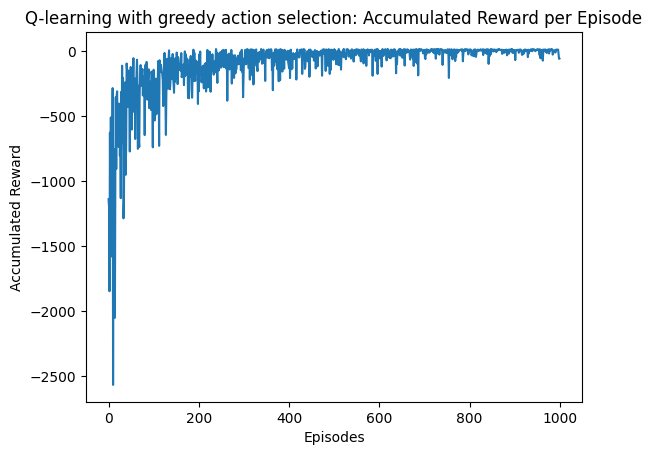

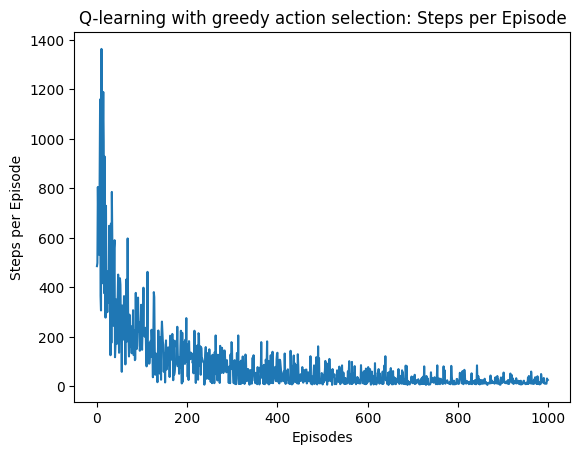

In [455]:
greedy_q_learning_rewards, greedy_q_learning_steps, _ = q_learning_training(alpha, gamma, epsilon, tau, num_episodes, greedy_action_selection)
# Plot accumulated rewards and steps per episode
plt.figure()
plt.plot(greedy_q_learning_rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Q-learning with greedy action selection: Accumulated Reward per Episode')
plt.show()

plt.figure()
plt.plot(greedy_q_learning_steps)
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('Q-learning with greedy action selection: Steps per Episode')
plt.show()

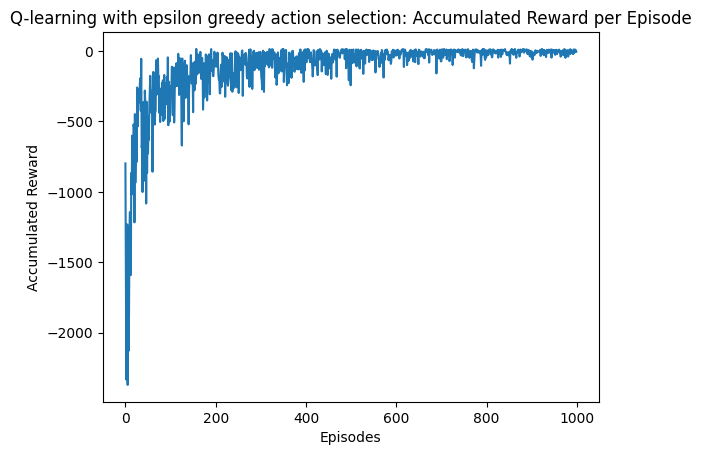

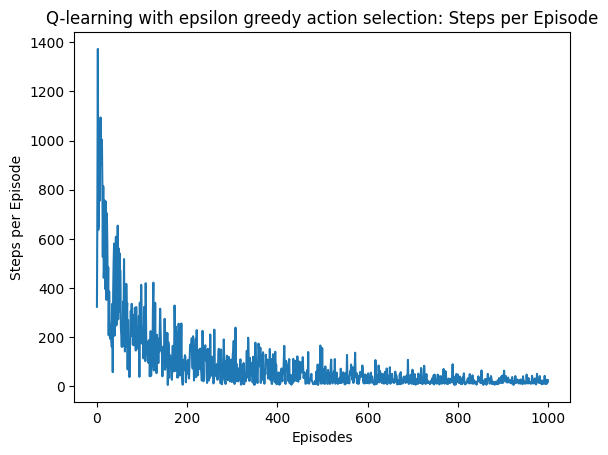

In [456]:
epsilon_greedy_q_learning_rewards, epsilon_greedy_q_learning_steps, _ = q_learning_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
# Plot accumulated rewards and steps per episode
plt.figure()
plt.plot(epsilon_greedy_q_learning_rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Q-learning with epsilon greedy action selection: Accumulated Reward per Episode')
plt.show()

plt.figure()
plt.plot(epsilon_greedy_q_learning_steps)
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('Q-learning with epsilon greedy action selection: Steps per Episode')
plt.show()

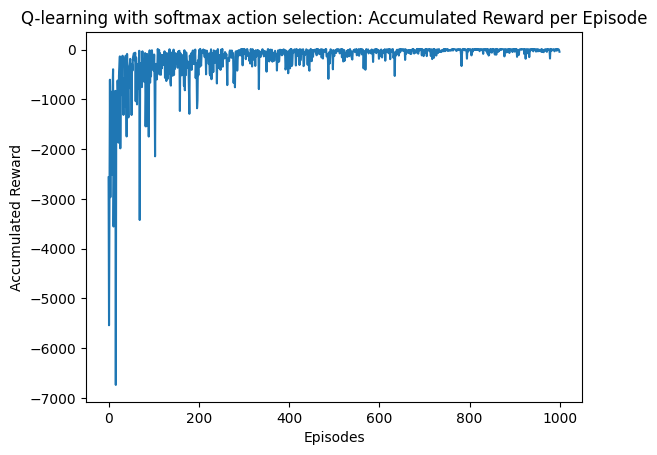

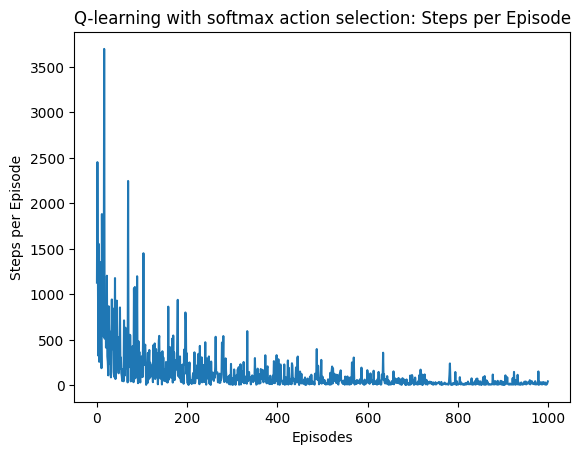

In [457]:
softmax_q_learning_rewards, softmax_q_learning_steps, _ = q_learning_training(alpha, gamma, epsilon, tau, num_episodes, softmax_action_selection)
# Plot accumulated rewards and steps per episode
plt.figure()
plt.plot(softmax_q_learning_rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Q-learning with softmax action selection: Accumulated Reward per Episode')
plt.show()

plt.figure()
plt.plot(softmax_q_learning_steps)
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('Q-learning with softmax action selection: Steps per Episode')
plt.show()

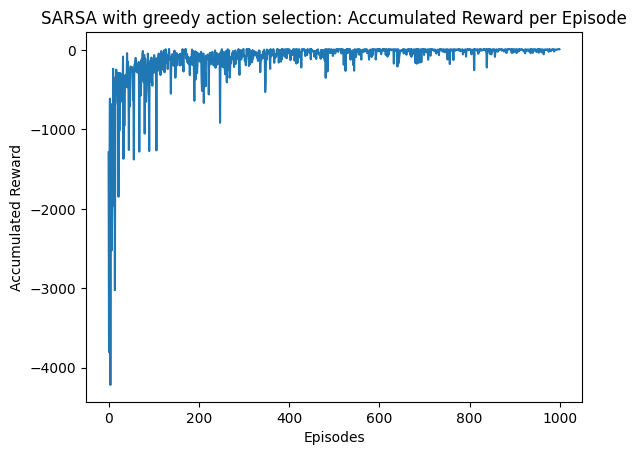

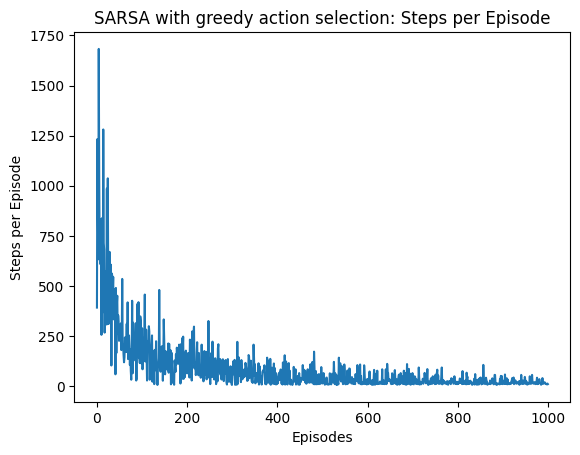

In [458]:
greedy_sarsa_rewards, greedy_sarsa_steps, _ = sarsa_training(alpha, gamma, epsilon, tau, num_episodes, greedy_action_selection)
# Plot accumulated rewards and steps per episode
plt.figure()
plt.plot(greedy_sarsa_rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('SARSA with greedy action selection: Accumulated Reward per Episode')
plt.show()

plt.figure()
plt.plot(greedy_sarsa_steps)
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('SARSA with greedy action selection: Steps per Episode')
plt.show()

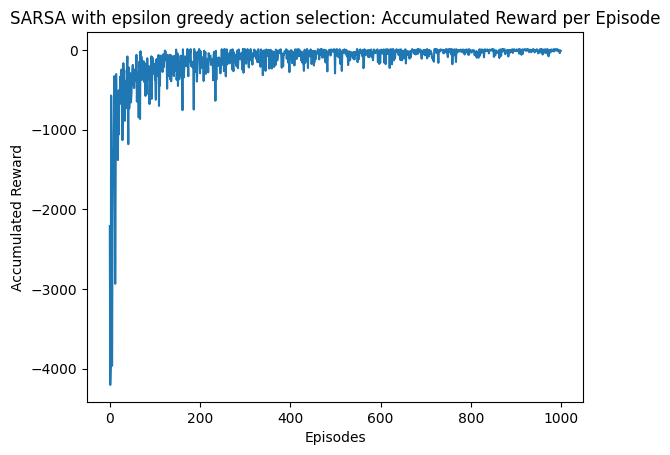

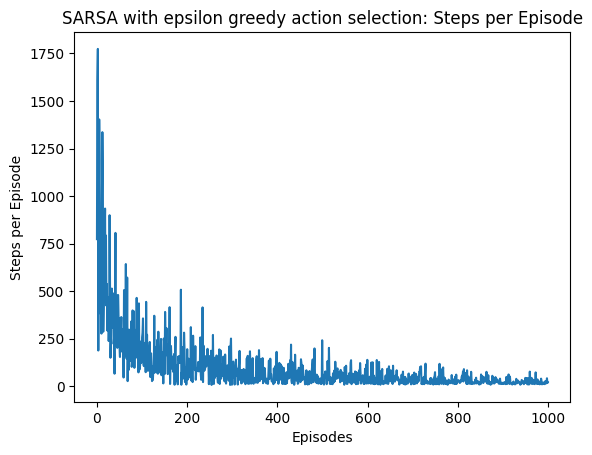

In [459]:
epsilon_greedy_sarsa_rewards, epsilon_greedy_sarsa_steps, _ = sarsa_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
# Plot accumulated rewards and steps per episode
plt.figure()
plt.plot(epsilon_greedy_sarsa_rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('SARSA with epsilon greedy action selection: Accumulated Reward per Episode')
plt.show()

plt.figure()
plt.plot(epsilon_greedy_sarsa_steps)
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('SARSA with epsilon greedy action selection: Steps per Episode')
plt.show()

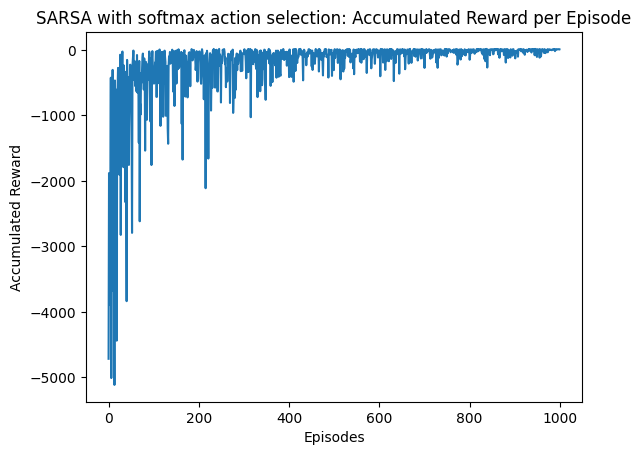

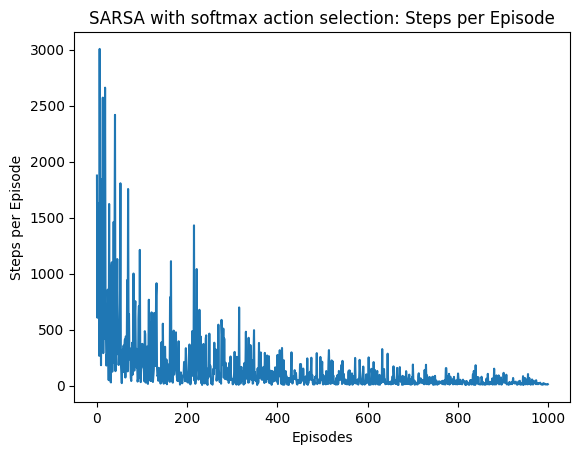

In [460]:
softmax_sarsa_rewards, softmax_sarsa_steps, _ = sarsa_training(alpha, gamma, epsilon, tau, num_episodes, softmax_action_selection)
# Plot accumulated rewards and steps per episode
plt.figure()
plt.plot(softmax_sarsa_rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('SARSA with softmax action selection: Accumulated Reward per Episode')
plt.show()

plt.figure()
plt.plot(softmax_sarsa_steps)
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('SARSA with softmax action selection: Steps per Episode')
plt.show()

With fixed parameters, I evaluated the six combinations mentioned above. The result shows that in both Q-learning and SARSA, the epsilon greedy approach exhibits less fluctuation than the softmax method and converges earlier than the greedy method. Therefore, I have chosen epsilon greedy for both algorithms.

1. Q-learning

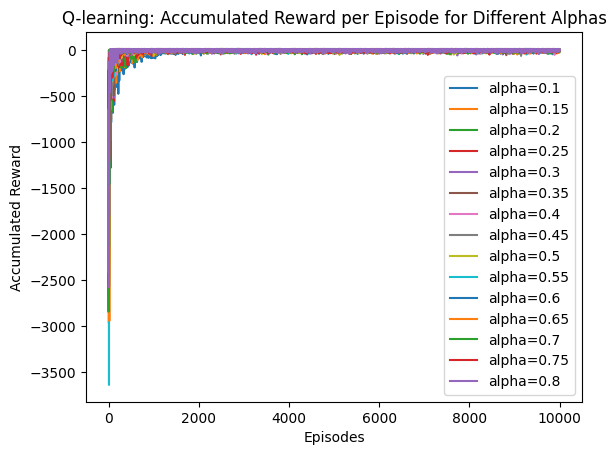

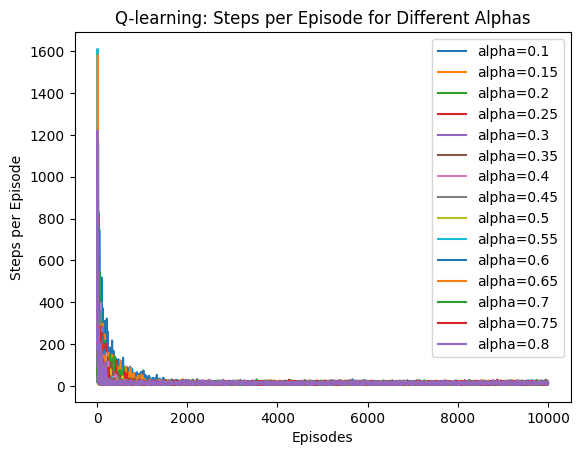

alpha=0.1: average_reward=-9.5949, average_steps=22.8009
alpha=0.15: average_reward=-6.1393, average_steps=20.41
alpha=0.2: average_reward=-4.4823, average_steps=19.1895
alpha=0.25: average_reward=-3.2881, average_steps=18.4615
alpha=0.3: average_reward=-2.6669, average_steps=17.9132
alpha=0.35: average_reward=-2.2595, average_steps=17.6156
alpha=0.4: average_reward=-2.0116, average_steps=17.3929
alpha=0.45: average_reward=-1.4931, average_steps=17.1462
alpha=0.5: average_reward=-1.4818, average_steps=17.0602
alpha=0.55: average_reward=-1.1659, average_steps=16.9099
alpha=0.6: average_reward=-1.1628, average_steps=16.8573
alpha=0.65: average_reward=-0.9219, average_steps=16.7388
alpha=0.7: average_reward=-0.5337, average_steps=16.5576
alpha=0.75: average_reward=-0.8242, average_steps=16.6276
alpha=0.8: average_reward=-0.5131, average_steps=16.4596


In [550]:
# setting parameters
gamma = 0.9  # Discount factor
epsilon = 0.1 # epsilon greedy
num_episodes = 10000 # training episodes

# change alpha, freeze other parameters
alphas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
results = {}

for alpha in alphas:
    rewards, steps, _ = q_learning_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
    results[alpha] = (rewards, steps)

plt.figure()
for alpha in alphas:
    plt.plot(results[alpha][0], label=f'alpha={alpha}')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Q-learning: Accumulated Reward per Episode for Different Alphas')
plt.legend()
plt.show()

plt.figure()
for alpha in alphas:
    plt.plot(results[alpha][1], label=f'alpha={alpha}')
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('Q-learning: Steps per Episode for Different Alphas')
plt.legend()
plt.show()

# calculate the average reward and the step
for alpha in alphas:
    avg_reward = np.mean(results[alpha][0])
    avg_steps = np.mean(results[alpha][1])
    print(f'alpha={alpha}: average_reward={avg_reward}, average_steps={avg_steps}')


In summary, when alpha is set to more than 0.55, the cumulative reward and step count exhibit less fluctuation in the initial stages, converge quickly, has a big decrease of average reward and steps, and demonstrate relative stability. Although the performance is best at alpha=0.8, a higher learning rate can lead to premature convergence and underfitting. Therefore, I choose the relatively good performance of 0.55.

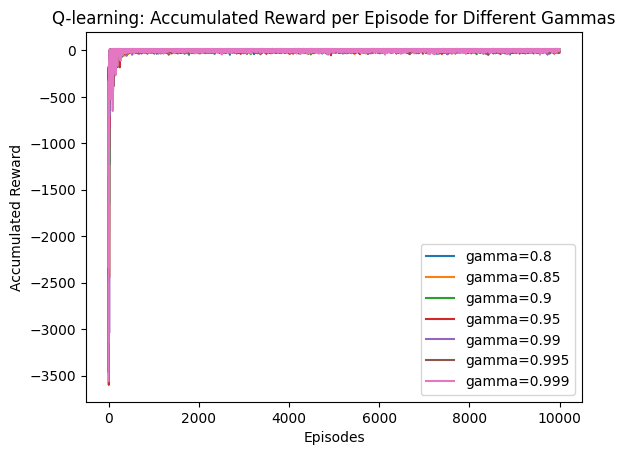

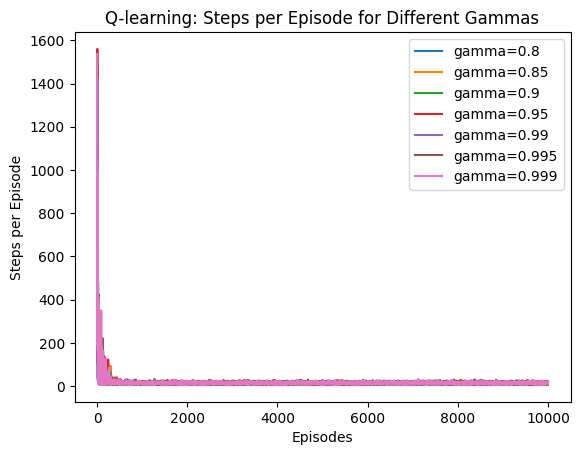

gamma=0.8: average_reward=-1.09, average_steps=16.9033
gamma=0.85: average_reward=-0.9056, average_steps=16.8206
gamma=0.9: average_reward=-1.1874, average_steps=16.8387
gamma=0.95: average_reward=-1.2698, average_steps=16.8509
gamma=0.99: average_reward=-1.1565, average_steps=16.8267
gamma=0.995: average_reward=-1.3537, average_steps=16.9186
gamma=0.999: average_reward=-1.3718, average_steps=16.9214


In [552]:
# setting parameters
alpha = 0.55  # Learning rate
epsilon = 0.1 # epsilon greedy
num_episodes = 10000  # Training episodes

# change gamma
gammas = [0.8, 0.85, 0.9, 0.95, 0.99, 0.995, 0.999]
results = {}

for gamma in gammas:
    rewards, steps, _ = q_learning_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
    results[gamma] = (rewards, steps)

plt.figure()
for gamma in gammas:
    plt.plot(results[gamma][0], label=f'gamma={gamma}')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Q-learning: Accumulated Reward per Episode for Different Gammas')
plt.legend()
plt.show()

plt.figure()
for gamma in gammas:
    plt.plot(results[gamma][1], label=f'gamma={gamma}')
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('Q-learning: Steps per Episode for Different Gammas')
plt.legend()
plt.show()

for gamma in gammas:
    avg_reward = np.mean(results[gamma][0])
    avg_steps = np.mean(results[gamma][1])
    print(f'gamma={gamma}: average_reward={avg_reward}, average_steps={avg_steps}')


From the perspectives of cumulative reward and step count, gamma=0.99 performs the best. It excels in both cumulative reward and step count, with minimal fluctuation. This indicates that the agent is not only able to quickly find the optimal strategy but also execute it consistently.

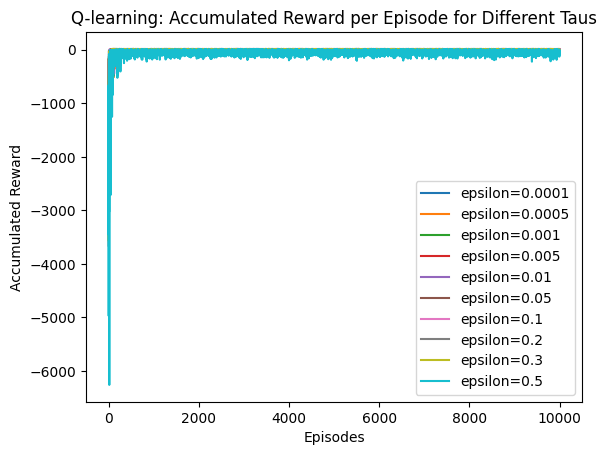

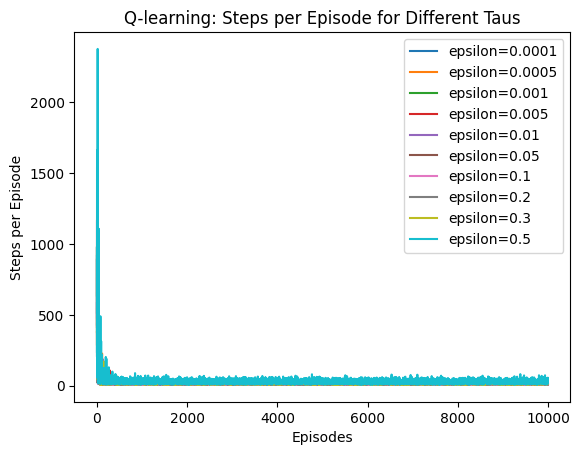

epsilon=0.0001: average_reward=4.684, average_steps=15.1613
epsilon=0.0005: average_reward=4.4731, average_steps=15.338
epsilon=0.001: average_reward=4.5674, average_steps=15.2482
epsilon=0.005: average_reward=4.4107, average_steps=15.233
epsilon=0.01: average_reward=4.2145, average_steps=15.2645
epsilon=0.05: average_reward=1.8322, average_steps=15.9512
epsilon=0.1: average_reward=-1.298, average_steps=16.8395
epsilon=0.2: average_reward=-9.0116, average_steps=19.064
epsilon=0.3: average_reward=-19.2599, average_steps=21.9404
epsilon=0.5: average_reward=-53.9261, average_steps=31.5695


In [553]:
# set parameters
alpha = 0.55  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 10000  # Training episodes

# change epsilon
epsilons = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
results = {}

for epsilon in epsilons:
    rewards, steps, _ = q_learning_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
    results[epsilon] = (rewards, steps)

plt.figure()
for epsilon in epsilons:
    plt.plot(results[epsilon][0], label=f'epsilon={epsilon}')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Q-learning: Accumulated Reward per Episode for Different Taus')
plt.legend()
plt.show()

plt.figure()
for epsilon in epsilons:
    plt.plot(results[epsilon][1], label=f'epsilon={epsilon}')
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('Q-learning: Steps per Episode for Different Taus')
plt.legend()
plt.show()

for epsilon in epsilons:
    avg_reward = np.mean(results[epsilon][0])
    avg_steps = np.mean(results[epsilon][1])
    print(f'epsilon={epsilon}: average_reward={avg_reward}, average_steps={avg_steps}')

As epsilon increases, the model's action selection becomes more random, leading to higher exploration. Conversely, as epsilon decreases, the model's action selection focuses more on high Q-value actions, utilizing known information more effectively but potentially getting stuck in local optima. Therefore, although epsilon=0.0001 achieves the high cumulative reward, with fewer average steps, faster convergence, and lower fluctuation, I chose epsilon=0.01.

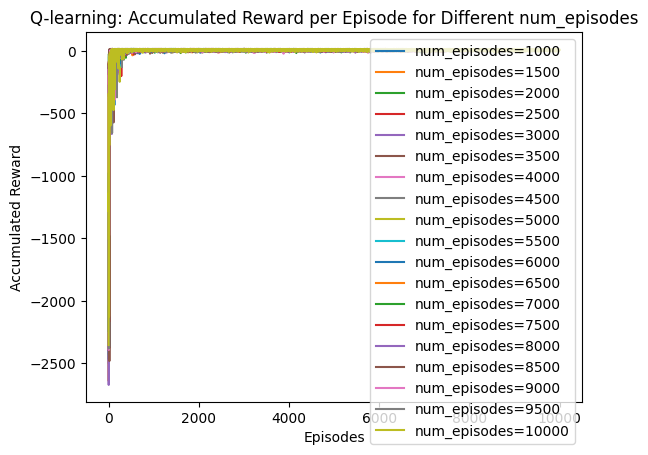

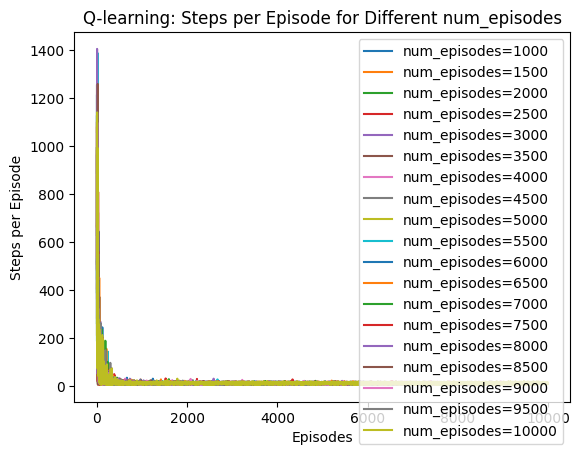

num_episodes=1000: average_reward=-24.862, average_steps=33.721
num_episodes=1500: average_reward=-13.799333333333333, average_steps=26.675333333333334
num_episodes=2000: average_reward=-8.6565, average_steps=23.4015
num_episodes=2500: average_reward=-5.6508, average_steps=21.5244
num_episodes=3000: average_reward=-3.44, average_steps=20.171
num_episodes=3500: average_reward=-1.782, average_steps=19.04057142857143
num_episodes=4000: average_reward=-0.77525, average_steps=18.443
num_episodes=4500: average_reward=0.14155555555555555, average_steps=17.852444444444444
num_episodes=5000: average_reward=1.0424, average_steps=17.2558
num_episodes=5500: average_reward=1.3789090909090909, average_steps=17.08472727272727
num_episodes=6000: average_reward=1.9551666666666667, average_steps=16.695833333333333
num_episodes=6500: average_reward=2.4455384615384617, average_steps=16.382
num_episodes=7000: average_reward=2.7664285714285715, average_steps=16.18542857142857
num_episodes=7500: average_rewa

In [555]:
# setting parameters
alpha = 0.55  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.01 # epsilon greedy

num_episodes_list = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
results = {}

for num_episodes in num_episodes_list:
    rewards, steps, _ = q_learning_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
    results[num_episodes] = (rewards, steps)

plt.figure()
for num_episodes in num_episodes_list:
    plt.plot(results[num_episodes][0], label=f'num_episodes={num_episodes}')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Q-learning: Accumulated Reward per Episode for Different num_episodes')
plt.legend()
plt.show()

plt.figure()
for num_episodes in num_episodes_list:
    plt.plot(results[num_episodes][1], label=f'num_episodes={num_episodes}')
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('Q-learning: Steps per Episode for Different num_episodes')
plt.legend()
plt.show()

for num_episodes in num_episodes_list:
    avg_reward = np.mean(results[num_episodes][0])
    avg_steps = np.mean(results[num_episodes][1])
    print(f'num_episodes={num_episodes}: average_reward={avg_reward}, average_steps={avg_steps}')

The results show that when the number of episodes reaches 10000, both the average number of steps and the rewards are the best. Therefore, I choose 10000 as the number of training episodes.

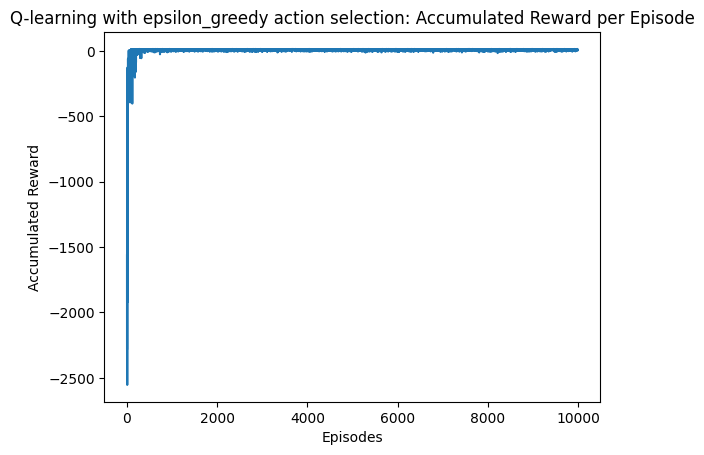

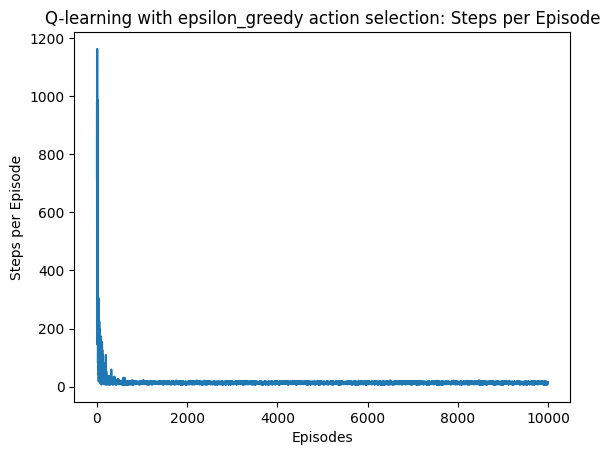

average_reward=4.0055, average_steps=15.442


In [874]:
# Q-learning outcome
# setting parameters
alpha = 0.55  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.01 # epsilon_greedy
num_episodes = 10000 # training episodes

epsilon_greedy_q_learning_rewards, epsilon_greedy_q_learning_steps, q_learning_Q = q_learning_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
# Plot accumulated rewards and steps per episode
plt.figure()
plt.plot(epsilon_greedy_q_learning_rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Q-learning with epsilon_greedy action selection: Accumulated Reward per Episode')
plt.show()

plt.figure()
plt.plot(epsilon_greedy_q_learning_steps)
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('Q-learning with epsilon_greedy action selection: Steps per Episode')
plt.show()

avg_reward = np.mean(epsilon_greedy_q_learning_rewards)
avg_steps = np.mean(epsilon_greedy_q_learning_steps)
print(f'average_reward={avg_reward}, average_steps={avg_steps}')

In [1183]:
# save the Q-table for Q-learning
np.save('q_learning_Q.npy', q_learning_Q)

2. Sarsa

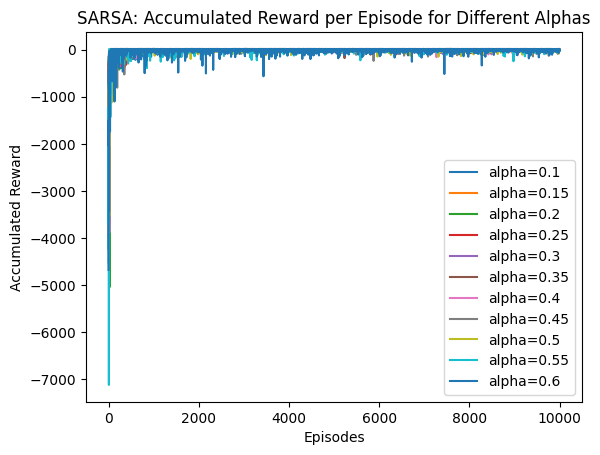

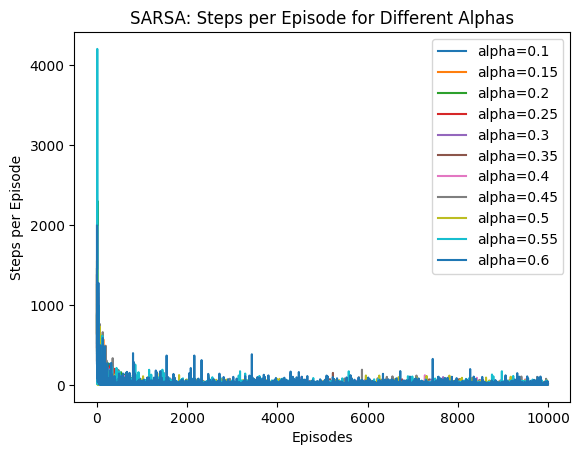

alpha=0.1: average_reward=-10.7801, average_steps=22.9952
alpha=0.15: average_reward=-7.3309, average_steps=20.6188
alpha=0.2: average_reward=-6.061, average_steps=19.7764
alpha=0.25: average_reward=-5.2816, average_steps=19.2247
alpha=0.3: average_reward=-4.8478, average_steps=19.0123
alpha=0.35: average_reward=-5.2944, average_steps=19.3662
alpha=0.4: average_reward=-6.088, average_steps=19.9573
alpha=0.45: average_reward=-6.692, average_steps=20.3957
alpha=0.5: average_reward=-7.4312, average_steps=21.0017
alpha=0.55: average_reward=-8.503, average_steps=21.6415
alpha=0.6: average_reward=-11.0159, average_steps=23.3003


In [828]:
# setting parameters
gamma = 0.99  # Discount factor
epsilon = 0.1  # epislon greedy
num_episodes = 10000 # training episodes

# change alpha, freeze other parameters
alphas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
results = {}

for alpha in alphas:
    rewards, steps, _ = sarsa_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
    results[alpha] = (rewards, steps)

plt.figure()
for alpha in alphas:
    plt.plot(results[alpha][0], label=f'alpha={alpha}')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('SARSA: Accumulated Reward per Episode for Different Alphas')
plt.legend()
plt.show()

plt.figure()
for alpha in alphas:
    plt.plot(results[alpha][1], label=f'alpha={alpha}')
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('SARSA: Steps per Episode for Different Alphas')
plt.legend()
plt.show()

# calculate the average reward and the step
for alpha in alphas:
    avg_reward = np.mean(results[alpha][0])
    avg_steps = np.mean(results[alpha][1])
    print(f'alpha={alpha}: average_reward={avg_reward}, average_steps={avg_steps}')


When alpha increases from 0.1 to 0.3, the average reward rises and the average steps decrease. However, when alpha exceeds 0.3, the performance of these two metrics deteriorates. This is because a higher learning rate may cause the model to update the Q-values rapidly in the initial stages, but as learning progresses, it may lead to over-updating, resulting in greater fluctuations and difficulty in converging to the optimal strategy. Therefore, my alpha is chosen to be 0.3.

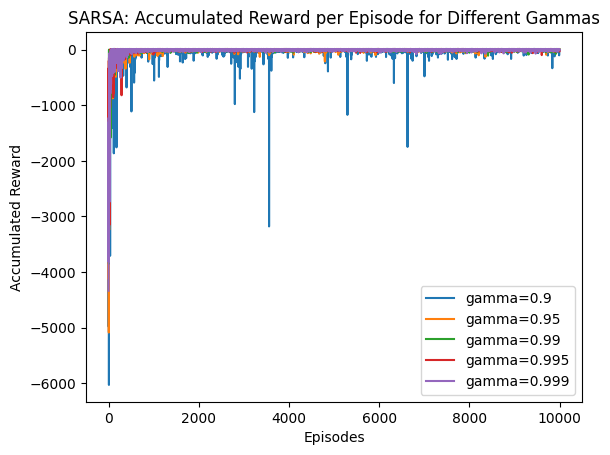

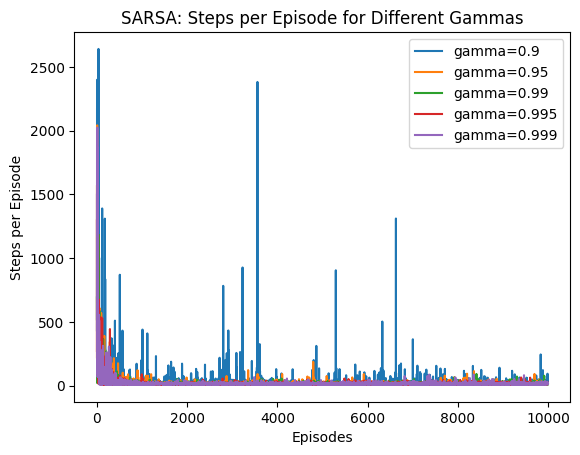

gamma=0.9: average_reward=-10.6974, average_steps=23.6001
gamma=0.95: average_reward=-5.9499, average_steps=20.0208
gamma=0.99: average_reward=-5.3691, average_steps=19.3212
gamma=0.995: average_reward=-5.3755, average_steps=19.3078
gamma=0.999: average_reward=-5.7405, average_steps=19.6224


In [829]:
# setting parameters
alpha = 0.3  # Learning rate
epsilon = 0.1  # epislon greedy
num_episodes = 10000 # training episodes

# change gamma
gammas = [0.9, 0.95, 0.99, 0.995, 0.999]  # Discount factor
results = {}
for gamma in gammas:
    rewards, steps, _ = sarsa_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
    results[gamma] = (rewards, steps)

plt.figure()
for gamma in gammas:
    plt.plot(results[gamma][0], label=f'gamma={gamma}')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('SARSA: Accumulated Reward per Episode for Different Gammas')
plt.legend()
plt.show()

plt.figure()
for gamma in gammas:
    plt.plot(results[gamma][1], label=f'gamma={gamma}')
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('SARSA: Steps per Episode for Different Gammas')
plt.legend()
plt.show()

for gamma in gammas:
    avg_reward = np.mean(results[gamma][0])
    avg_steps = np.mean(results[gamma][1])
    print(f'gamma={gamma}: average_reward={avg_reward}, average_steps={avg_steps}')

The plot shows that when gamma=0.99 and gamma=0.995 perform well, but gamma=0.99 demonstrates more stability in terms of cumulative reward and steps in the curve. Therefore, I have decided to keep gamma at 0.99.

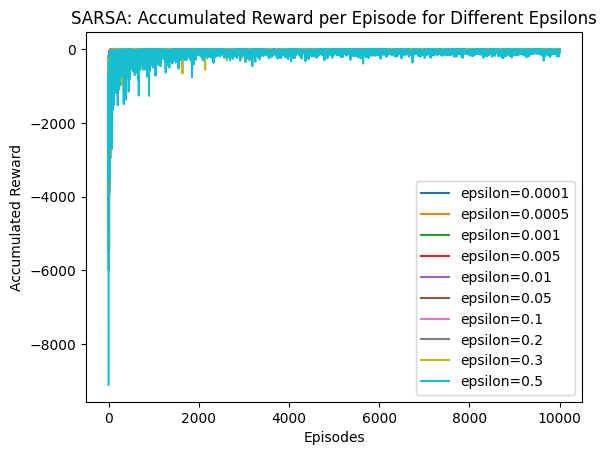

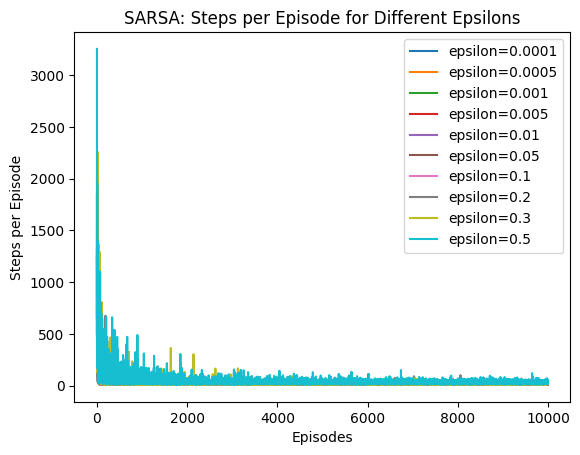

epsilon=0.0001: average_reward=2.4811, average_steps=16.3112
epsilon=0.0005: average_reward=2.4393, average_steps=16.3395
epsilon=0.001: average_reward=2.3663, average_steps=16.3846
epsilon=0.005: average_reward=2.061, average_steps=16.4856
epsilon=0.01: average_reward=1.6298, average_steps=16.7098
epsilon=0.05: average_reward=-1.3516, average_steps=17.8858
epsilon=0.1: average_reward=-5.5383, average_steps=19.4706
epsilon=0.2: average_reward=-16.3659, average_steps=23.217
epsilon=0.3: average_reward=-32.1503, average_steps=28.4597
epsilon=0.5: average_reward=-79.574, average_steps=41.9849


In [833]:
# setting parameters
alpha = 0.3  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 10000 # training episodes
epsilons = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
results = {}

for epsilon in epsilons:
    rewards, steps, _ = sarsa_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
    results[epsilon] = (rewards, steps)

plt.figure()
for epsilon in epsilons:
    plt.plot(results[epsilon][0], label=f'epsilon={epsilon}')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('SARSA: Accumulated Reward per Episode for Different Epsilons')
plt.legend()
plt.show()

plt.figure()
for epsilon in epsilons:
    plt.plot(results[epsilon][1], label=f'epsilon={epsilon}')
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('SARSA: Steps per Episode for Different Epsilons')
plt.legend()
plt.show()

for epsilon in epsilons:
    avg_reward = np.mean(results[epsilon][0])
    avg_steps = np.mean(results[epsilon][1])
    print(f'epsilon={epsilon}: average_reward={avg_reward}, average_steps={avg_steps}')

By increasing epsilon, the likelihood of exploration increases, while the probability of exploitation decreases. The data show that when epsilon is less than 0.005, both the average rewards and the number of steps tend to stabilize. However, an epsilon value that is too low might lead to convergence at a local optimum. Therefore, I consider 0.005 to be the optimal choice, as it offers a balanced performance in terms of both cumulative reward and stability in the number of steps.

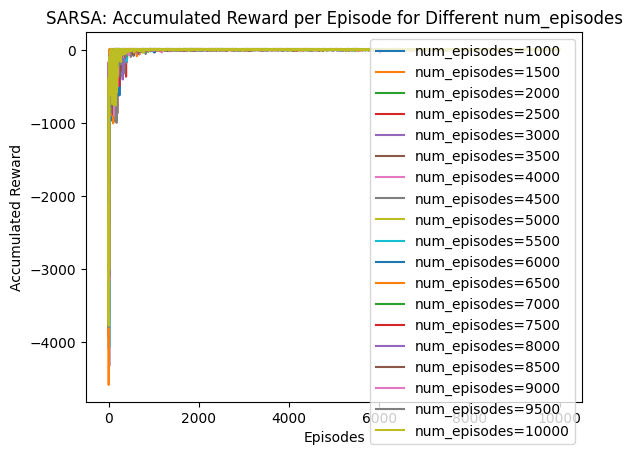

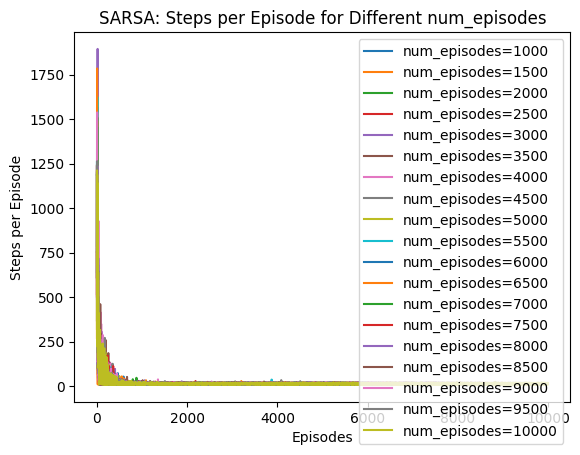

num_episodes=1000: average_reward=-46.615, average_steps=45.574
num_episodes=1500: average_reward=-28.814, average_steps=34.802
num_episodes=2000: average_reward=-19.3615, average_steps=29.1025
num_episodes=2500: average_reward=-14.2808, average_steps=26.1476
num_episodes=3000: average_reward=-10.588, average_steps=23.998
num_episodes=3500: average_reward=-8.216857142857142, average_steps=22.621142857142857
num_episodes=4000: average_reward=-6.26475, average_steps=21.46875
num_episodes=4500: average_reward=-4.573111111111111, average_steps=20.447111111111113
num_episodes=5000: average_reward=-3.352, average_steps=19.7818
num_episodes=5500: average_reward=-2.452909090909091, average_steps=19.26709090909091
num_episodes=6000: average_reward=-1.6398333333333333, average_steps=18.699333333333332
num_episodes=6500: average_reward=-0.7190769230769231, average_steps=18.130153846153846
num_episodes=7000: average_reward=-0.071, average_steps=17.764142857142858
num_episodes=7500: average_reward=

In [834]:
# setting parameters
alpha = 0.3  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.005 # epsilon greedy

num_episodes_list = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
results = {}

for num_episodes in num_episodes_list:
    rewards, steps, _ = sarsa_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
    results[num_episodes] = (rewards, steps)

plt.figure()
for num_episodes in num_episodes_list:
    plt.plot(results[num_episodes][0], label=f'num_episodes={num_episodes}')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('SARSA: Accumulated Reward per Episode for Different num_episodes')
plt.legend()
plt.show()

plt.figure()
for num_episodes in num_episodes_list:
    plt.plot(results[num_episodes][1], label=f'num_episodes={num_episodes}')
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('SARSA: Steps per Episode for Different num_episodes')
plt.legend()
plt.show()

for num_episodes in num_episodes_list:
    avg_reward = np.mean(results[num_episodes][0])
    avg_steps = np.mean(results[num_episodes][1])
    print(f'num_episodes={num_episodes}: average_reward={avg_reward}, average_steps={avg_steps}')

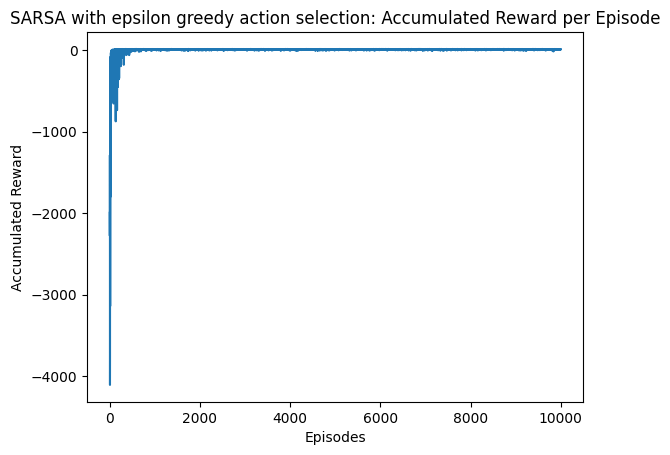

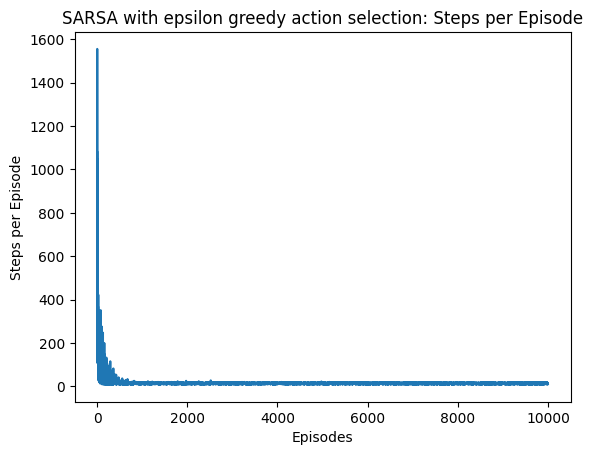

average_reward=2.2289, average_steps=16.3978


In [835]:
# setting parameters
alpha = 0.3  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.005 # epsilon greedy
num_episodes = 10000 # training episodes

epsilon_greedy_sarsa_rewards, epsilon_greedy_sarsa_steps, sarsa_Q = sarsa_training(alpha, gamma, epsilon, tau, num_episodes, epsilon_greedy_action_selection)
# Plot accumulated rewards and steps per episode
plt.figure()
plt.plot(epsilon_greedy_sarsa_rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('SARSA with epsilon greedy action selection: Accumulated Reward per Episode')
plt.show()

plt.figure()
plt.plot(epsilon_greedy_sarsa_steps)
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('SARSA with epsilon greedy action selection: Steps per Episode')
plt.show()

avg_reward = np.mean(epsilon_greedy_sarsa_rewards)
avg_steps = np.mean(epsilon_greedy_sarsa_steps)
print(f'average_reward={avg_reward}, average_steps={avg_steps}')

In [1186]:
# save the Q-table for SARSA
np.save('sarsa_Q.npy', sarsa_Q)

### Discussion & Testing

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def greedy_action_selection(Q, state, epsilon, tau):
    return np.argmax(Q[state])

In [3]:
# get in discussion, first set to 100
testing_episode = 100
testing_max_steps = 100

In [4]:
# load saved Q and initialise enviroment
q_learning_Q = np.load('q_learning_Q.npy')
sarsa_Q = np.load('sarsa_Q.npy')
env = gym.make("Taxi-v3", render_mode='ansi')

In [5]:
def test_trained_agent(Q, env, num_episodes=100, max_steps=100):
    total_rewards = []
    total_steps = []

    all_episodes = []

    for _ in range(num_episodes):
        state = env.reset()[0]
        episode_states = []
        total_reward = 0
        steps = 0
        done = False

        while not done and steps < max_steps:
            action = greedy_action_selection(Q, state, _, _)
            next_state, reward, done = env.step(action)[:3]
            episode_states.append((state, action, reward, next_state))
            total_reward += reward
            steps += 1
            state = next_state

        total_rewards.append(total_reward)
        total_steps.append(steps)
        all_episodes.append(episode_states)

    avg_reward = np.mean(total_rewards)
    avg_steps = np.mean(total_steps)

    return avg_reward, avg_steps, all_episodes, total_rewards, total_steps

In [11]:
# test Q-learning
avg_q_learning_reward, avg_q_learning_steps, q_learning_episodes, q_learning_total_rewards, q_learning_total_steps = test_trained_agent(q_learning_Q, env, testing_episode, testing_max_steps)
print(f'Q-learning Test: average_reward={avg_q_learning_reward}, average_steps={avg_q_learning_steps}')

# test SARSA
avg_sarsa_reward, avg_sarsa_steps, sarsa_episodes, sarsa_total_rewards, sarsa_total_steps = test_trained_agent(sarsa_Q, env, testing_episode, testing_max_steps)
print(f'SARSA Test: average_reward={avg_sarsa_reward}, average_steps={avg_sarsa_steps}')

Q-learning Test: average_reward=7.77, average_steps=13.23
SARSA Test: average_reward=8.09, average_steps=12.91


Visualization

In [13]:
def visualize_episode(env, episode):
    total_reward = 0
    steps = 0
    env.reset()

    for (state, action, reward, next_state) in episode:
        env.unwrapped.s = state
        print(env.render())
        print(f'Step: {steps}')
        print(f'State: {state}, Action: {action}, Reward: {reward}, Total Accumulated Reward: {reward + total_reward}')
        print()
        
        total_reward += reward
        steps += 1

In [14]:
random_q_learning_episode = random.choice(q_learning_episodes)
random_sarsa_episode = random.choice(sarsa_episodes)

In [15]:
print("Q-learning:")
visualize_episode(env, random_q_learning_episode)

Q-learning:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 0
State: 366, Action: 1, Reward: -1, Total Accumulated Reward: -1

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 1
State: 266, Action: 1, Reward: -1, Total Accumulated Reward: -2

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 2
State: 166, Action: 2, Reward: -1, Total Accumulated Reward: -3

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 3
State: 186, Action: 1, Reward: -1, Total Accumulated Reward: -4

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 4
State: 86, Action: 4, Reward: -1, Total Accumulated Reward: -5

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 5
State: 98, Action: 3, Reward: -1, Total Accumulated Reward: -6

+---------+
|R: | :_:G|
| : | : : |


In [16]:
print("SARSA:")
visualize_episode(env, random_sarsa_episode)

SARSA:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 0
State: 173, Action: 0, Reward: -1, Total Accumulated Reward: -1

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 1
State: 273, Action: 0, Reward: -1, Total Accumulated Reward: -2

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 2
State: 373, Action: 0, Reward: -1, Total Accumulated Reward: -3

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 3
State: 473, Action: 4, Reward: -1, Total Accumulated Reward: -4

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 4
State: 477, Action: 1, Reward: -1, Total Accumulated Reward: -5

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+


Step: 5
State: 377, Action: 1, Reward: -1, Total Accumulated Reward: -6

+---------+
|R: | : :G|
| : | : : |
| :